#  Week 1 HW : Bayesian Belief Update

Dong Gyu Son, April 4th, 2020

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

## Case 1 : Beta-Binomial (Unknown p)

In [2]:
from scipy.stats import binom, beta

Sampling density

In [3]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1, p, size = N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


 Prior Belief

Text(0, 0.5, 'p(theta)')

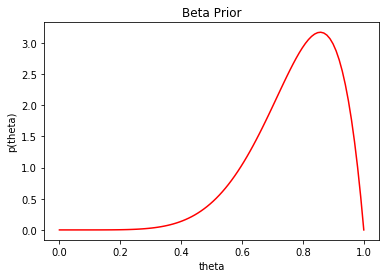

In [4]:
# choose your belief parameter and distribution
a, b =7, 2

prior = beta(a, b)
theta = np.linspace(0, 1, 100)
plt.plot(theta, prior.pdf(theta), color='r')
plt.title('Beta Prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

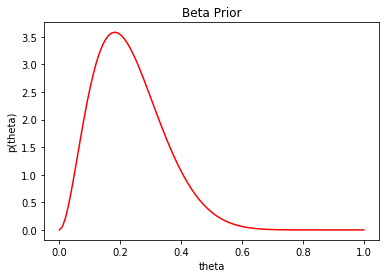

In [5]:
# other belief is also possible : no limitations in choosing prior parameters
a2, b2 = 3, 10
prior2 = beta(a2, b2)
theta = np.linspace(0, 1, 100)
plt.plot(theta, prior2.pdf(theta), color='r')
plt.title('Beta Prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Likelihood (Sampling density)

(0, 0.0005)

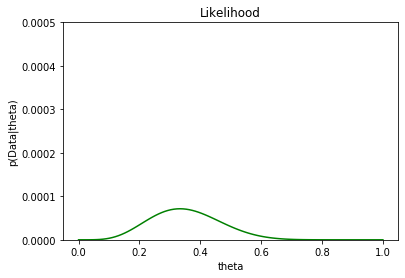

In [6]:
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0, 1, 100)
    return p**suc * (1-p)**(N-suc)

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("Likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0, 0.0005)


Posterior : Updated Belief

Text(0, 0.5, 'p(theta)')

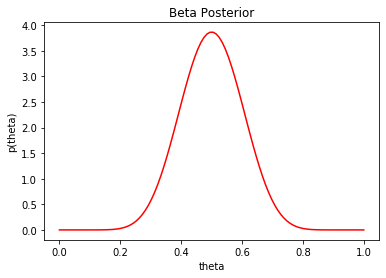

In [7]:
# Belief Update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0, 1, 100)
plt.plot(theta, posterior.pdf(theta), color='r')
plt.title('Beta Posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 4)

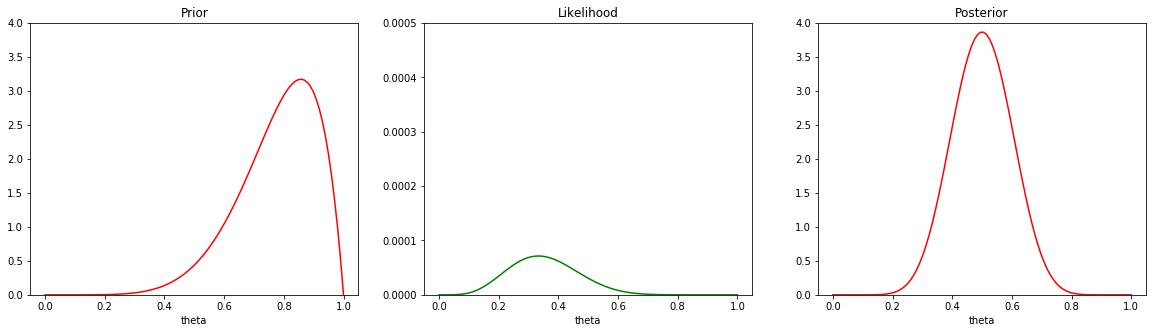

In [8]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), color='r')
ax1.set_title('Prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('Likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0, 0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), color='r')
ax3.set_title('Posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

## Case 2 : Gaussian w/ unknown mu

In [9]:
from scipy.stats import norm

Sampling density

In [10]:
# Select random population parameter (Population parameter not given)
mu, sigma = 20, 1

# Generate toy sample
N = 100
np.random.seed(101)
data=norm.rvs(mu, sigma, size=N)
print(data)
print(np.mean(data))
print(np.std(data))
xbar = np.mean(data); lmda = 1/np.std(data)

[22.707 20.628 20.908 20.504 20.651 19.681 19.152 20.606 17.982 20.74
 20.529 19.411 20.189 19.241 19.067 20.955 20.191 21.979 22.606 20.684
 20.303 21.694 18.294 18.841 19.865 20.391 20.167 20.185 20.808 20.073
 20.639 20.33  19.503 19.246 19.057 20.485 19.883 21.902 20.238 21.997
 19.007 20.197 18.863 20.    21.026 19.843 19.968 20.65  22.155 19.39
 19.245 19.654 20.147 19.521 20.559 21.025 19.074 21.863 18.866 20.61
 20.386 22.084 19.623 20.23  20.681 21.035 19.969 21.94  18.995 19.258
 20.187 19.267 18.617 21.482 20.961 17.859 20.993 21.192 18.953 21.293
 18.532 19.506 19.837 20.486 20.392 20.221 19.145 21.542 20.666 19.462
 19.431 21.407 20.642 19.095 19.609 21.028 18.027 19.133 20.721 18.777]
20.166369880423115
1.0338189430873386


Prior belief

Text(0.5, 0, 'mu')

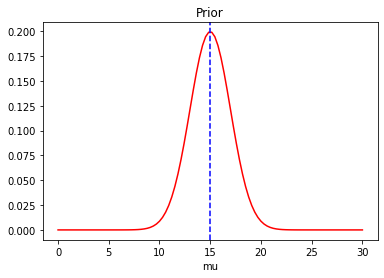

In [11]:
# Choose your own belief parameters

mu0, lmda_mu0 = 15, 0.5
prior = norm(loc=mu0, scale=1/lmda_mu0)
theta = np.linspace(0, 30, 100)
plt.plot(theta, prior.pdf(theta), 'r')
plt.axvline(15, color = 'b', linestyle = '--')
plt.title("Prior")
plt.xlabel("mu")

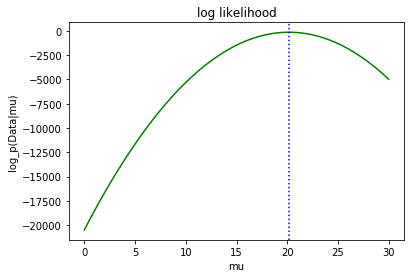

In [12]:
# Define likelihood

def likelihood(x, mu):
    l_l = 0 
    for i in x:
        l_l += np.log(norm.pdf(i, mu, 1))
    return l_l

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("log likelihood")
plt.xlabel("mu")
plt.ylabel("log_p(Data|mu)")
plt.axvline(xbar, color = 'b', linestyle = ':')

Text(0.5, 0, 'mu')

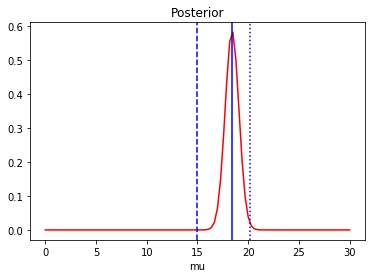

In [13]:
# Posterior distribution given data

lmda_mu_pos = lmda_mu0 + lmda
mu_pos = (mu0 * lmda_mu0 + xbar * lmda)/lmda_mu_pos
posterior = norm(loc=mu_pos, scale=1/lmda_mu_pos)
theta = np.linspace(0, 30, 100)
plt.plot(theta, posterior.pdf(theta), 'r')
plt.axvline(15, color = 'b', linestyle = '--')
plt.axvline(mu_pos, color = 'b')
plt.axvline(xbar, color = 'b', linestyle = ':')
plt.title("Posterior")
plt.xlabel("mu")

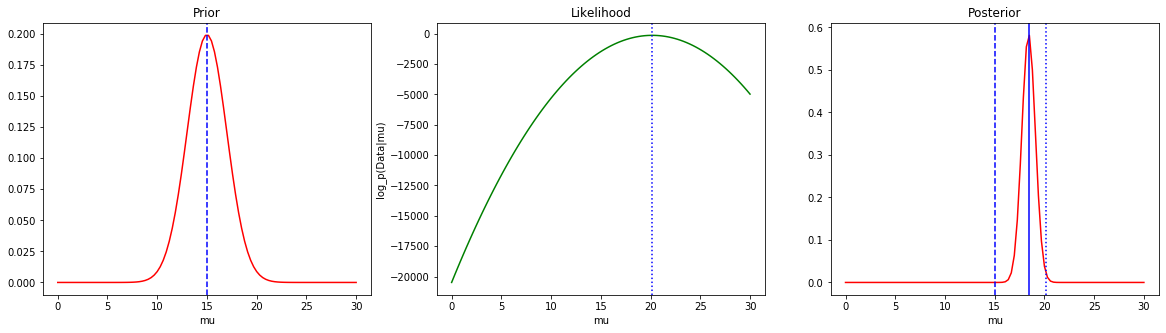

In [14]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), 'r')
ax1.set_title('Prior')
ax1.set_xlabel('mu')
ax1.axvline(15, color = 'b', linestyle = '--')

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('Likelihood')
ax2.set_xlabel('mu')
ax2.set_ylabel("log_p(Data|mu)")
ax2.axvline(xbar, color = 'b', linestyle = ':')

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), 'r')
ax3.set_title('Posterior')
ax3.set_xlabel('mu')
ax3.axvline(15, color = 'b', linestyle = '--')
ax3.axvline(mu_pos, color = 'b')
ax3.axvline(xbar, color = 'b', linestyle = ':')